<a href="https://colab.research.google.com/github/RaianaSeixas/Portfolio/blob/main/LSTM_Sales_Prediction/LSTM_Temporal_Series_Furniture_sales_predictions_April_2021_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EVALUATING OF FUTURE EVENTS BASED IN ARTIFICIAL NEURAL NETWORKS IN A CASE STUDY OF SALES OF FURNITURES**

**Abstract:** Accurate forecasting of different events is a key aspect for successful management with relevance in different fields including weather forecast, environmental evaluation of air pollution and evaluation of business strategies. In this context, recurrent neural networks, more specifically, LSTM (long-short term memory) have been successfully adopted in many time series or sequential data applications in traditional situations, as well as, in situations where the absence of data, outliers and nonlinearity reduces the applicability of traditional models like the autoregressive ones. In this article, the use of **LSTM recurrent artificial neural networks is evaluated for sales forecasting**. Six different conditions of variables were evaluated to describe the LSTM artificial neural network models using r-scored (R2) and mean squared error (MSE) as metrics to describe the quality of these models. Relative to LSTM, it was observed that the model evaluated was able to capture the data seasonality, describing the sales with r-scored superior to 0.7 and making a correct description of sales even after 24 months of training. Relative to description of sales, it was observed that the use of sales in the last three months was the best period to predict future sales and the use of sales of office items improved the quality of the model.

Obs.:This is the code associated to final model described in the paper available(in portuguese language) in  : https://github.com/RaianaSeixas/Portfolio/blob/main/LSTM_Sales_Prediction/Temporal%20series%20XXIV%20ENMC%20and%20XII%20ECTM%20v_04.pdf



In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
! git clone https://github.com/RaianaSeixas/Machine_Learning_Datasets
%cd Machine_Learning_Datasets

Cloning into 'Machine_Learning_Datasets'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
/content/Machine_Learning_Datasets


In [4]:
# df = pd.read_csv("Superstore.csv", encoding='windows-1252')
df = pd.read_excel("Superstore_data.xlsx")
df.head(3) # shows headers with top 3 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [5]:
df.shape # 9994 points in the dataset

(9994, 21)

In [6]:
Names =df['Category'].drop_duplicates()
Names

0          Furniture
2    Office Supplies
7         Technology
Name: Category, dtype: object

In [7]:
Stuff =df['Sub-Category'].drop_duplicates()
Stuff

0        Bookcases
1           Chairs
2           Labels
3           Tables
4          Storage
5      Furnishings
6              Art
7           Phones
8          Binders
9       Appliances
12           Paper
26     Accessories
30       Envelopes
53       Fasteners
138       Supplies
165       Machines
335        Copiers
Name: Sub-Category, dtype: object

In [8]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')

y = furniture['Sales'].resample('MS').mean()
y = y.reset_index()

In [9]:
chairs = df.loc[df['Sub-Category'] == 'Chairs']
chairs = chairs.groupby('Order Date')['Sales'].sum().reset_index()
chairs = chairs.set_index('Order Date')
w = chairs['Sales'].resample('MS').mean()
w=w.fillna(0)

In [10]:
machines = df.loc[df['Sub-Category'] == 'Machines']
machines = machines.groupby('Order Date')['Sales'].sum().reset_index()
machines = machines.set_index('Order Date')
m = machines['Sales'].resample('MS').mean()
m=m.fillna(0) 

In [11]:
tables = df.loc[df['Sub-Category'] == 'Tables']
tables = tables.groupby('Order Date')['Sales'].sum().reset_index()
tables = tables.set_index('Order Date')
t = tables['Sales'].resample('MS').mean()
t=t.fillna(0) 

Text(0, 0.5, 'Sales in milions ($)')

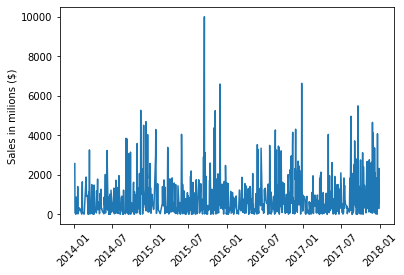

In [12]:
plt.plot(furniture)
plt.xticks(rotation=45)
plt.ylabel('Sales in milions ($)')

In [13]:
print('Profit store:',sum(df['Profit'].values)) # Profit in milions ($)

Profit store: 286397.02170000126


In [14]:
names = t.index; print(names)

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')


In [15]:
import datetime
months = []
for i in names:
  months.append(i.month)
#months =pd.Series(months).reset_index()

In [16]:
len(y)

48

In [17]:
y1 = y.shift(1).values[:,1]
y2 = y.shift(2).values[:,1]
y3 = y.shift(3).values[:,1]
y4 = y.shift(4).values[:,1]
y = y.values[:,1]

In [18]:
dataframe = pd.DataFrame({'mo':months,'t-1':y1,'t-2':y2,'t-3':y3,'y':y})
dataframe = dataframe.dropna()

In [19]:
# Data used for LSTM (4 entrances and one tardet (y))
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
dataframe.head(3)

,mo,t-1,t-2,t-3,y
3,4,857.291529,367.9316,480.194231,567.488357
4,5,567.488357,857.291529,367.9316,432.049188
5,6,432.049188,567.488357,857.291529,695.059242


In [20]:
X=dataframe.iloc[:,:-1]
y=np.array(dataframe.iloc[:,-1]).reshape(-1, 1)

In [21]:
rows, cols = X.shape
ntrain = int(rows*0.8)
X_train=X.iloc[0:ntrain,:].copy()
y_train= y[0:ntrain,:].copy()
X_test=X.drop(X_train.index)
y_test=np.delete(y,range(ntrain))
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [22]:
#, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
#X_train
scalerX = MinMaxScaler() 
scalerY = MinMaxScaler() 
scalerX.fit(X_train) 
scalerY.fit(y_train) 
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)
y_train= scalerY.transform(y_train) 
y_test= scalerY.transform(y_test)

In [23]:
for i in range(1):

  # model = keras.Sequential()
  # Add an Embedding layer expecting input vocab of size 1000, and
  # output embedding dimension of size 64.
  #model.add(layers.Embedding(input_dim=1000, output_dim=64))

  model = Sequential()
  # Add a LSTM layer with 128 internal units.
  model.add(LSTM(128))

  # Add a Dense layer with 10 units.
  model.add(Dense(1))

  model.compile(loss='mean_squared_error', optimizer='adam')
  
  #Put in tensor format
  X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
  # reshape input to be [samples, time steps, features]
  # reshape input to be [samples, time steps, features]

  model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)
  #model.summary()
  y_calc_train=model.predict(X_train)
  y_calc_test=model.predict(X_test)
  mse_test=mean_squared_error(y_test,y_calc_test)
  R2_test=r2_score(y_test,y_calc_test)
  mse_train=mean_squared_error(y_train,y_calc_train)
  R2_train=r2_score(y_train,y_calc_train)

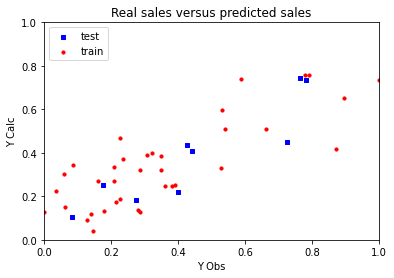

In [24]:
# Real sales versus predicted sales Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='test')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='train')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
plt.legend(loc='upper left')
plt.ylabel('Y Calc')
plt.xlabel('Y Obs')
plt.title('Real sales versus predicted sales')
plt.show()

In [25]:
mse=mean_squared_error(y_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.014068243024037138
R^2 teste= 0.7618942527930654


In [26]:
mse=mean_squared_error(y_train,y_calc_train)
print("MSE train=",mse)
R2=r2_score(y_train,y_calc_train)
print("R^2 train=",R2)

MSE train= 0.023616651791182316
R^2 train= 0.646156762341505


In [27]:
y_calc = y_calc_train.tolist()

In [28]:
for yi in y_calc_test:
  y_calc.append(yi)

In [29]:
y_calc = np.array(y_calc).reshape(1,-1)
y_calc = scalerY.inverse_transform(y_calc)

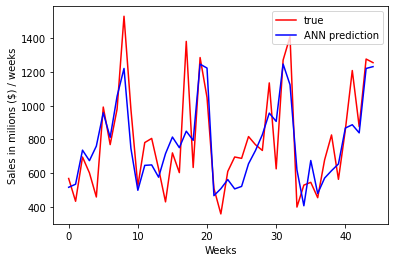

In [30]:
line1, =plt.plot(range(len(y)),y,c='r')
line2, =plt.plot(range(len(y)),y_calc[0], c='b')
plt.legend([line1,line2],['true','ANN prediction'],loc='upper right')
plt.xlabel('Weeks')
plt.ylabel('Sales in milions ($) / weeks')
plt.show()